In [85]:
import pandas as pd


In [86]:

features  = pd.read_csv('../0_DataPreparation/features.csv')
era5  = pd.read_csv('../0_DataPreparation/data/ERA5-Hourly.csv')
era5['Datum'] = pd.to_datetime(era5['time'])
features['Datum'] = pd.to_datetime(features['Datum'])



In [87]:
features

,id,Datum,Umsatz,Bewoelkung,Temperatur,Windgeschwindigkeit,Rain,KielerWoche,CPI,Unemployment,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,1307011,2013-07-01,148.828353,6.0,17.8375,15.0,1.567431,0,93.5,6.8,...,0,0,0,0,1,0,0,0,0,0
1,1307021,2013-07-02,159.793757,3.0,17.3125,10.0,0.140967,0,93.5,6.8,...,0,0,0,0,1,0,0,0,0,0
2,1307031,2013-07-03,111.885594,7.0,21.0750,6.0,6.276774,0,93.5,6.8,...,0,0,0,0,1,0,0,0,0,0
3,1307041,2013-07-04,168.864941,7.0,18.8500,7.0,0.126180,0,93.5,6.8,...,0,0,0,0,1,0,0,0,0,0
4,1307051,2013-07-05,171.280754,5.0,19.9750,12.0,1.255988,0,93.5,6.8,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11159,1812226,2018-12-22,NaN,8.0,4.3000,4.0,0.392234,0,98.5,4.9,...,0,0,0,0,0,0,0,0,0,1
11160,1812236,2018-12-23,NaN,7.0,6.4500,9.0,4.244212,0,98.5,4.9,...,0,0,0,0,0,0,0,0,0,1
11161,1812246,2018-12-24,NaN,7.0,2.5000,10.0,0.000000,0,98.5,4.9,...,0,0,0,0,0,0,0,0,0,1
11162,1812276,2018-12-27,NaN,7.0,7.1250,12.0,0.000000,0,98.5,4.9,...,0,0,0,0,0,0,0,0,0,1


/tmp/ipykernel_19042/1550479993.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=df, x="Temp_day_class", y="Umsatz", ci=95)


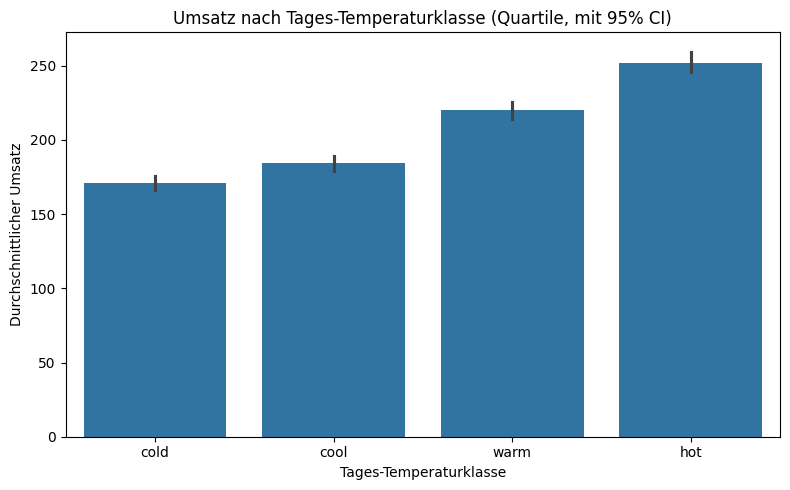

In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# CSV-Datei neu laden
df = features

# Temperaturklassifizierung (reine Tages-Temperatur, nicht 5-Tage-Mittel)
df['Temp_day_class'] = pd.qcut(df['Temperatur'], q=4, labels=["cold", "cool", "warm", "hot"])

# Plot für Umsatz nach Tages-Temperaturklasse mit 95%-Konfidenzintervall
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="Temp_day_class", y="Umsatz", ci=95)
plt.title("Umsatz nach Tages-Temperaturklasse (Quartile, mit 95% CI)")
plt.xlabel("Tages-Temperaturklasse")
plt.ylabel("Durchschnittlicher Umsatz")
plt.tight_layout()
plt.show()

In [89]:
# Quartilgrenzen für die Tages-Temperatur berechnen
day_temp_quartiles = pd.qcut(df['Temperatur'], q=4, retbins=True)[1]
day_temp_quartiles

array([-8.475   ,  6.25    , 11.625   , 17.865625, 32.671428])

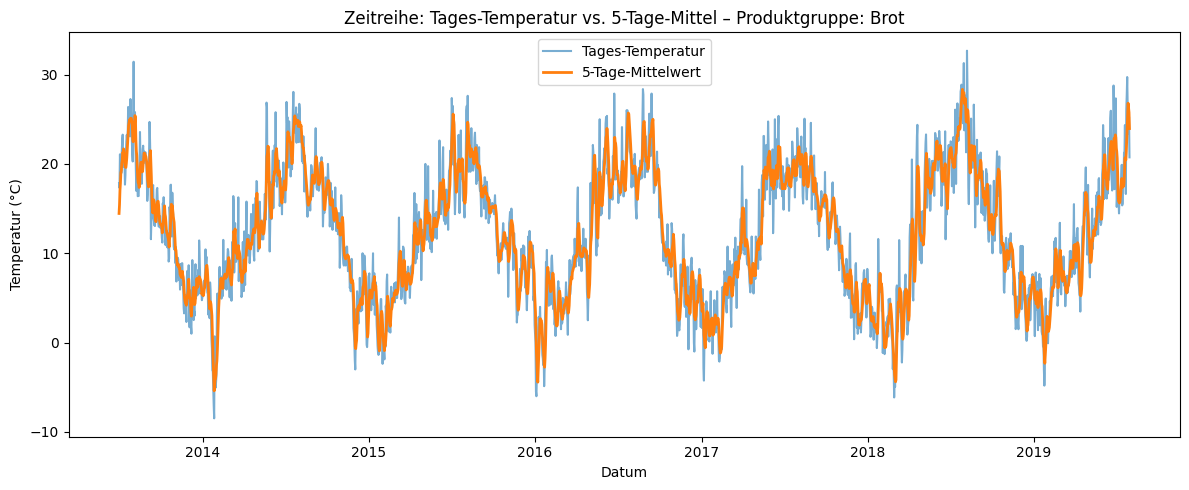

In [90]:


# Nur eine Produktgruppe auswählen, z. B. "brot"
gruppe = "Brot"

# Filter für die gewünschte Warengruppe
df_gruppe = df[df[f'Group_{gruppe}'] == 1].copy()

# Sicherstellen, dass Datum datetime ist
df_gruppe['Datum'] = pd.to_datetime(df_gruppe['Datum'])

# Plot erzeugen
plt.figure(figsize=(12, 5))
plt.plot(df_gruppe['Datum'], df_gruppe['Temperatur'], label='Tages-Temperatur', alpha=0.6)
plt.plot(df_gruppe['Datum'], df_gruppe['Temp_5d_avg'], label='5-Tage-Mittelwert', linewidth=2)
plt.title(f"Zeitreihe: Tages-Temperatur vs. 5-Tage-Mittel – Produktgruppe: {gruppe}")
plt.xlabel("Datum")
plt.ylabel("Temperatur (°C)")
plt.legend()
plt.tight_layout()
plt.show()

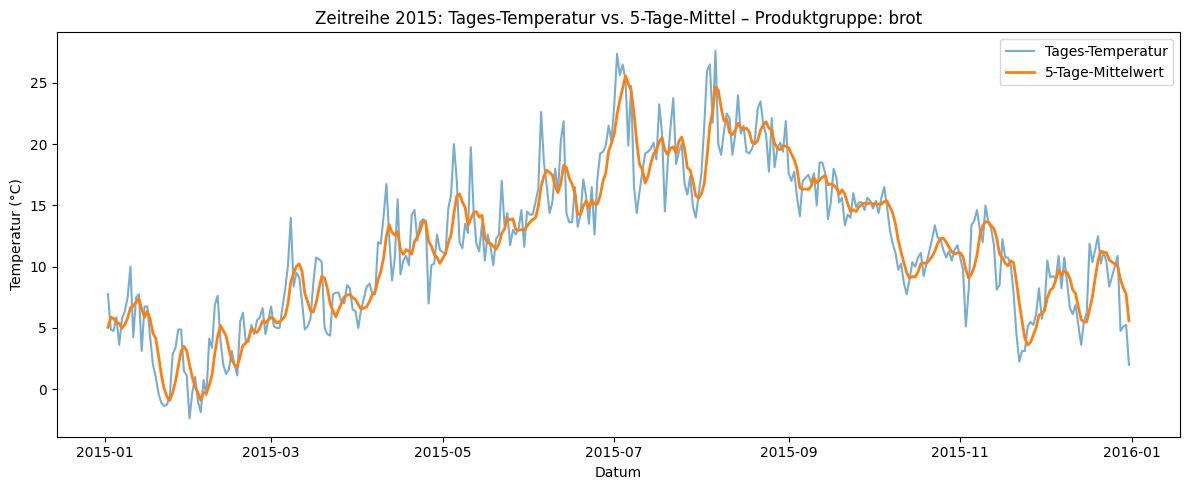

In [91]:
df_2015 = df_gruppe[(df_gruppe['Datum'].dt.year == 2015)]

# Plot erzeugen
plt.figure(figsize=(12, 5))
plt.plot(df_2015['Datum'], df_2015['Temperatur'], label='Tages-Temperatur', alpha=0.6)
plt.plot(df_2015['Datum'], df_2015['Temp_5d_avg'], label='5-Tage-Mittelwert', linewidth=2)
plt.title("Zeitreihe 2015: Tages-Temperatur vs. 5-Tage-Mittel – Produktgruppe: brot")
plt.xlabel("Datum")
plt.ylabel("Temperatur (°C)")
plt.legend()
plt.tight_layout()
plt.show()


In [92]:
df

,id,Datum,Umsatz,Bewoelkung,Temperatur,Windgeschwindigkeit,Rain,KielerWoche,CPI,Unemployment,...,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Temp_day_class
0,1307011,2013-07-01,148.828353,6.0,17.8375,15.0,1.567431,0,93.5,6.8,...,0,0,0,1,0,0,0,0,0,warm
1,1307021,2013-07-02,159.793757,3.0,17.3125,10.0,0.140967,0,93.5,6.8,...,0,0,0,1,0,0,0,0,0,warm
2,1307031,2013-07-03,111.885594,7.0,21.0750,6.0,6.276774,0,93.5,6.8,...,0,0,0,1,0,0,0,0,0,hot
3,1307041,2013-07-04,168.864941,7.0,18.8500,7.0,0.126180,0,93.5,6.8,...,0,0,0,1,0,0,0,0,0,hot
4,1307051,2013-07-05,171.280754,5.0,19.9750,12.0,1.255988,0,93.5,6.8,...,0,0,0,1,0,0,0,0,0,hot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11159,1812226,2018-12-22,NaN,8.0,4.3000,4.0,0.392234,0,98.5,4.9,...,0,0,0,0,0,0,0,0,1,cold
11160,1812236,2018-12-23,NaN,7.0,6.4500,9.0,4.244212,0,98.5,4.9,...,0,0,0,0,0,0,0,0,1,cool
11161,1812246,2018-12-24,NaN,7.0,2.5000,10.0,0.000000,0,98.5,4.9,...,0,0,0,0,0,0,0,0,1,cold
11162,1812276,2018-12-27,NaN,7.0,7.1250,12.0,0.000000,0,98.5,4.9,...,0,0,0,0,0,0,0,0,1,cool


/tmp/ipykernel_19042/2975480581.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=df_merged, x='Temp_above_avg', y='Umsatz_total', ci=95)


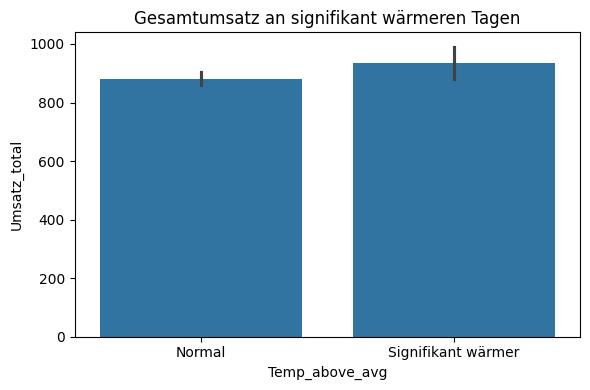

/tmp/ipykernel_19042/2975480581.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=df_merged, x='Temp_below_avg', y='Umsatz_total', ci=95)


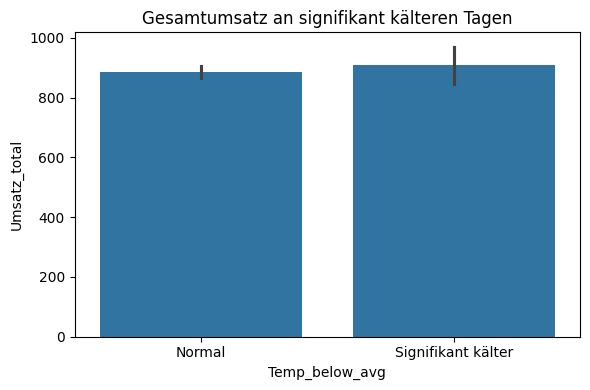

In [93]:
umsatz_total = df.groupby('Datum')['Umsatz'].sum().reset_index(name='Umsatz_total')

# Merge mit signifikanten Temperaturdaten aus Gruppe "brot"
df_gruppe_total = df[df['Group_Brot'] == 1][['Datum', 'Temp_above_avg', 'Temp_below_avg']].drop_duplicates()
df_merged = pd.merge(umsatz_total, df_gruppe_total, on='Datum', how='left')

# Fehlende Signifikanz-Werte (z. B. kein brot-Eintrag an dem Tag) = 0 setzen
df_merged[[ 'Temp_above_avg', 'Temp_below_avg']] = df_merged[
    [ 'Temp_above_avg', 'Temp_below_avg']
].fillna(0)

# Barplot: Gesamtumsatz bei signifikant wärmeren Tagen
plt.figure(figsize=(6, 4))
sns.barplot(data=df_merged, x='Temp_above_avg', y='Umsatz_total', ci=95)
plt.xticks([0, 1], ["Normal", "Signifikant wärmer"])
plt.title("Gesamtumsatz an signifikant wärmeren Tagen")
plt.tight_layout()
plt.show()

# Barplot: Gesamtumsatz bei signifikant kälteren Tagen
plt.figure(figsize=(6, 4))
sns.barplot(data=df_merged, x='Temp_below_avg', y='Umsatz_total', ci=95)
plt.xticks([0, 1], ["Normal", "Signifikant kälter"])
plt.title("Gesamtumsatz an signifikant kälteren Tagen")
plt.tight_layout()
plt.show()

/tmp/ipykernel_19042/3233436542.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=df_merged, x='Temp_anomaly_label', y='Umsatz_total', order=order, ci=95)


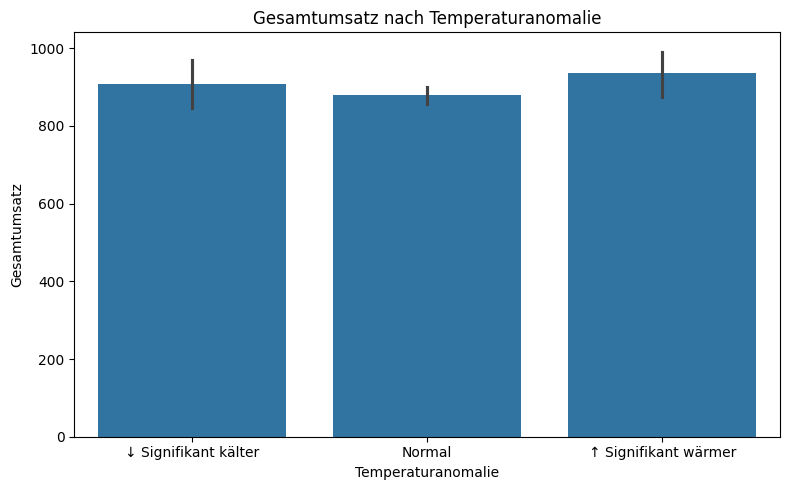

In [94]:
# Alle 3 Kategorien in ein gemeinsames Merkmal "Temp_anomaly_label"
def classify_anomaly(row):
    if row['Temp_above_avg'] == 1:
        return '↑ Signifikant wärmer'
    elif row['Temp_below_avg'] == 1:
        return '↓ Signifikant kälter'
    else:
        return 'Normal'

df_merged['Temp_anomaly_label'] = df_merged.apply(classify_anomaly, axis=1)

# Sortierung erzwingen
order = ['↓ Signifikant kälter', 'Normal', '↑ Signifikant wärmer']

# Gemeinsamer Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=df_merged, x='Temp_anomaly_label', y='Umsatz_total', order=order, ci=95)
plt.title("Gesamtumsatz nach Temperaturanomalie")
plt.xlabel("Temperaturanomalie")
plt.ylabel("Gesamtumsatz")
plt.tight_layout()
plt.show()

KeyError: 'Temp_significantly_above'

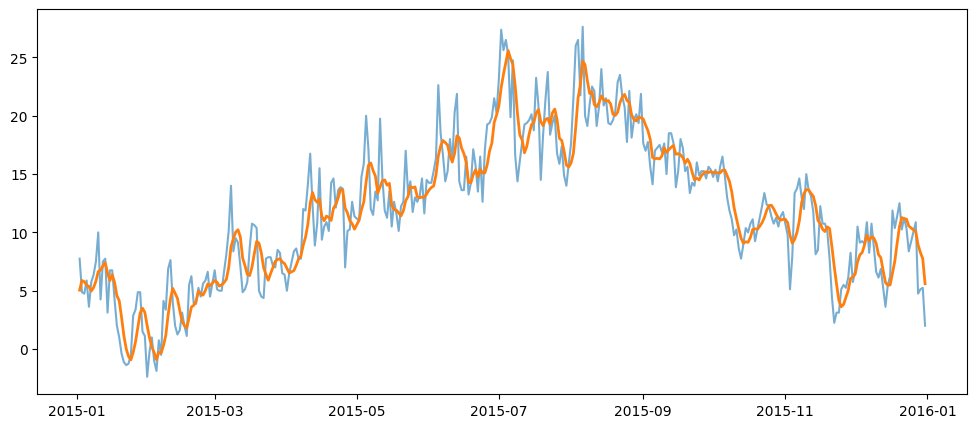

In [95]:
# Filter für Produktgruppe "brot" zur Temperaturanzeige mit Signifikanzpunkten
df_brot = df[df['Group_Brot'] == 1].copy()

# Zeitreihe 2015
df_2015 = df_brot[df_brot['Datum'].dt.year == 2015]

plt.figure(figsize=(12, 5))
plt.plot(df_2015['Datum'], df_2015['Temperatur'], label='Tages-Temperatur', alpha=0.6)
plt.plot(df_2015['Datum'], df_2015['Temp_5d_avg'], label='5-Tage-Mittelwert', linewidth=2)

# Signifikante Marker
plt.scatter(df_2015[df_2015['Temp_significantly_above'] == 1]['Datum'],
            df_2015[df_2015['Temp_significantly_above'] == 1]['Temperatur'],
            color='red', label='↑ Signifikant wärmer')

plt.scatter(df_2015[df_2015['Temp_significantly_below'] == 1]['Datum'],
            df_2015[df_2015['Temp_significantly_below'] == 1]['Temperatur'],
            color='blue', label='↓ Signifikant kälter')

plt.title("Temperatur-Zeitreihe 2015 mit signifikanten Abweichungen – Produktgruppe: brot")
plt.xlabel("Datum")
plt.ylabel("Temperatur (°C)")
plt.legend()
plt.tight_layout()
plt.show()

/tmp/ipykernel_19042/1251404534.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  umsatz_by_temp_class = df.groupby('Temp_class')['Umsatz'].mean().reindex(labels)


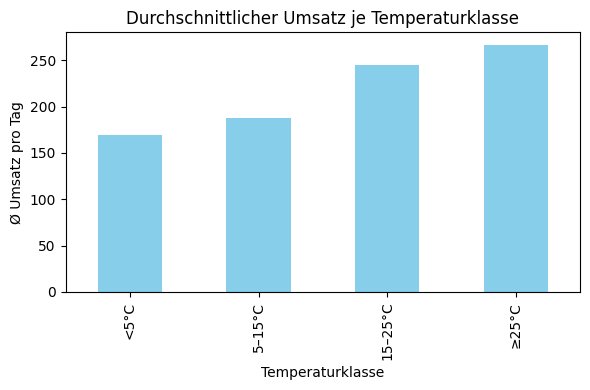

In [96]:
bins = [-float('inf'), 5, 15, 25, float('inf')]
labels = ['<5°C', '5–15°C', '15–25°C', '≥25°C']
df['Temp_class'] = pd.cut(df['Temperatur'], bins=bins, labels=labels)

# Umsatz aggregieren nach Temperaturklasse
umsatz_by_temp_class = df.groupby('Temp_class')['Umsatz'].mean().reindex(labels)

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
umsatz_by_temp_class.plot(kind='bar', color='skyblue')
plt.ylabel("Ø Umsatz pro Tag")
plt.xlabel("Temperaturklasse")
plt.title("Durchschnittlicher Umsatz je Temperaturklasse")
plt.tight_layout()
plt.show()

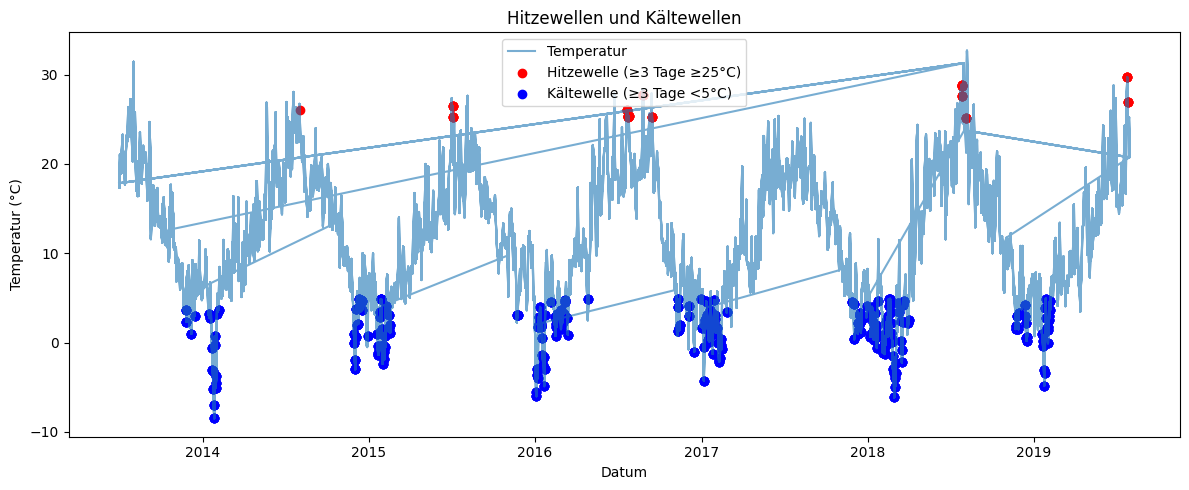

In [97]:
# 2. Hitze- und Kältewellen erkennen
# Bedingungen: mind. 3 Tage in Folge mit Temperatur >25°C (Hitze) oder <5°C (Kälte)

# Hitze: 3 Tage in Folge ≥25°C
df['Hot'] = df['Temperatur'] >= 25
df['Heatwave_3d'] = df['Hot'].rolling(window=3, min_periods=3).sum() == 3

# Kälte: 3 Tage in Folge <5°C
df['Cold'] = df['Temperatur'] < 5
df['Coldwave_3d'] = df['Cold'].rolling(window=3, min_periods=3).sum() == 3

# Zeitreihenplot: Temperatur + Hitzewellen
plt.figure(figsize=(12, 5))
plt.plot(df['Datum'], df['Temperatur'], label='Temperatur', alpha=0.6)
plt.scatter(df[df['Heatwave_3d']]['Datum'], df[df['Heatwave_3d']]['Temperatur'],
            color='red', label='Hitzewelle (≥3 Tage ≥25°C)')
plt.scatter(df[df['Coldwave_3d']]['Datum'], df[df['Coldwave_3d']]['Temperatur'],
            color='blue', label='Kältewelle (≥3 Tage <5°C)')
plt.legend()
plt.title("Hitzewellen und Kältewellen")
plt.xlabel("Datum")
plt.ylabel("Temperatur (°C)")
plt.tight_layout()
plt.show()

/tmp/ipykernel_19042/1700663858.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=df_merged, x='Wetterlage', y='Umsatz_total', ci=95,


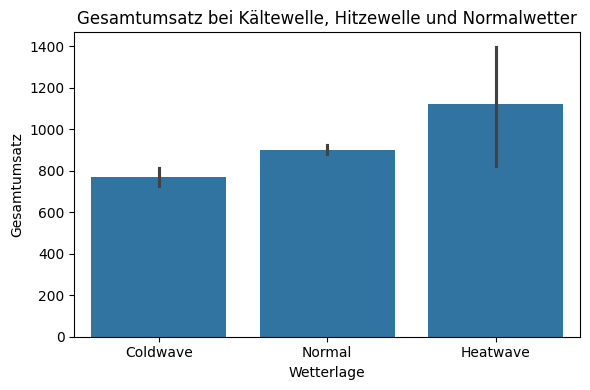

In [98]:
# Hitze-/Kältewellen-Feld als Kategorien zusammenfassen
def classify_wave(row):
    if row['Heatwave_3d']:
        return 'Heatwave'
    elif row['Coldwave_3d']:
        return 'Coldwave'
    else:
        return 'Normal'
df['Wetterlage'] = df.apply(classify_wave, axis=1)

# Umsatz pro Tag berechnen
umsatz_total = df.groupby('Datum')['Umsatz'].sum().reset_index(name='Umsatz_total')

# Merge mit Wetterlage
wetterlage = df[['Datum', 'Wetterlage']].drop_duplicates()
df_merged = pd.merge(umsatz_total, wetterlage, on='Datum', how='left')

# Durchschnittlicher Umsatz nach Wetterlage
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.barplot(data=df_merged, x='Wetterlage', y='Umsatz_total', ci=95,
            order=['Coldwave', 'Normal', 'Heatwave'])
plt.title("Gesamtumsatz bei Kältewelle, Hitzewelle und Normalwetter")
plt.xlabel("Wetterlage")
plt.ylabel("Gesamtumsatz")
plt.tight_layout()
plt.show()

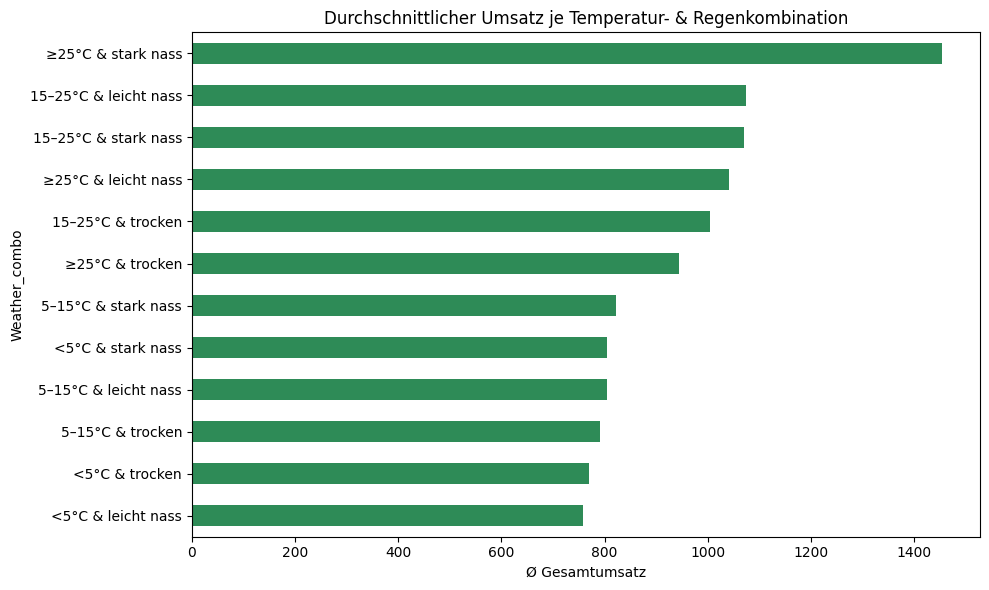

In [99]:
# 5. Wetterkombinationen – z. B. warm & trocken, kalt & nass
# Binning für Temperatur und Regen (tp / Rain)
# Regen wurde vorher auf 'Rain' standardisiert in diesem Datensatz

# Temperatur binning wie zuvor
temp_bins = [-float('inf'), 5, 15, 25, float('inf')]
temp_labels = ['<5°C', '5–15°C', '15–25°C', '≥25°C']
df['Temp_bin'] = pd.cut(df['Temperatur'], bins=temp_bins, labels=temp_labels)

# Regen binning
rain_bins = [-float('inf'), 0.1, 5, float('inf')]
rain_labels = ['trocken', 'leicht nass', 'stark nass']
df['Rain_bin'] = pd.cut(df['Rain'], bins=rain_bins, labels=rain_labels)

# Kombination beider
df['Weather_combo'] = df['Temp_bin'].astype(str) + ' & ' + df['Rain_bin'].astype(str)

# Umsatz aggregieren nach Wetterkombination
umsatz_total = df.groupby('Datum')['Umsatz'].sum().reset_index(name='Umsatz_total')
weather_info = df[['Datum', 'Weather_combo']].drop_duplicates()
df_combo = pd.merge(umsatz_total, weather_info, on='Datum', how='left')

# Mittelwerte je Wetterkombination
combo_means = df_combo.groupby('Weather_combo')['Umsatz_total'].mean().sort_values()

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
combo_means.plot(kind='barh', color='seagreen')
plt.xlabel("Ø Gesamtumsatz")
plt.title("Durchschnittlicher Umsatz je Temperatur- & Regenkombination")
plt.tight_layout()
plt.show()

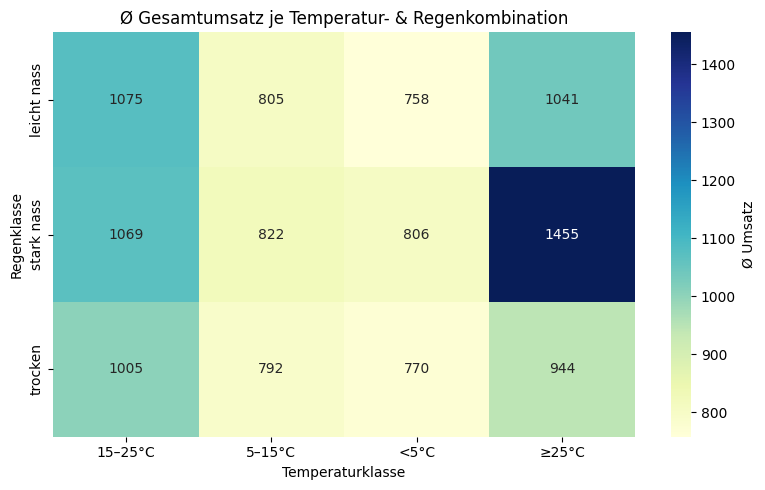

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

# Kreuztabelle: Umsatzmittelwerte je Temperatur- und Regenklasse
pivot_table = df_combo.copy()
pivot_table[['Temp_class', 'Rain_class']] = df_combo['Weather_combo'].str.split('&', expand=True)
pivot_table['Temp_class'] = pivot_table['Temp_class'].str.strip()
pivot_table['Rain_class'] = pivot_table['Rain_class'].str.strip()

heatmap_data = pivot_table.pivot_table(
    index='Rain_class',
    columns='Temp_class',
    values='Umsatz_total',
    aggfunc='mean'
)

# Plot
plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu", cbar_kws={'label': 'Ø Umsatz'})
plt.title("Ø Gesamtumsatz je Temperatur- & Regenkombination")
plt.xlabel("Temperaturklasse")
plt.ylabel("Regenklasse")
plt.tight_layout()
plt.show()

/tmp/ipykernel_19042/3260192471.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=df_combo, x='Weather_combo', y='Umsatz_total', ci=95, order=combo_order)


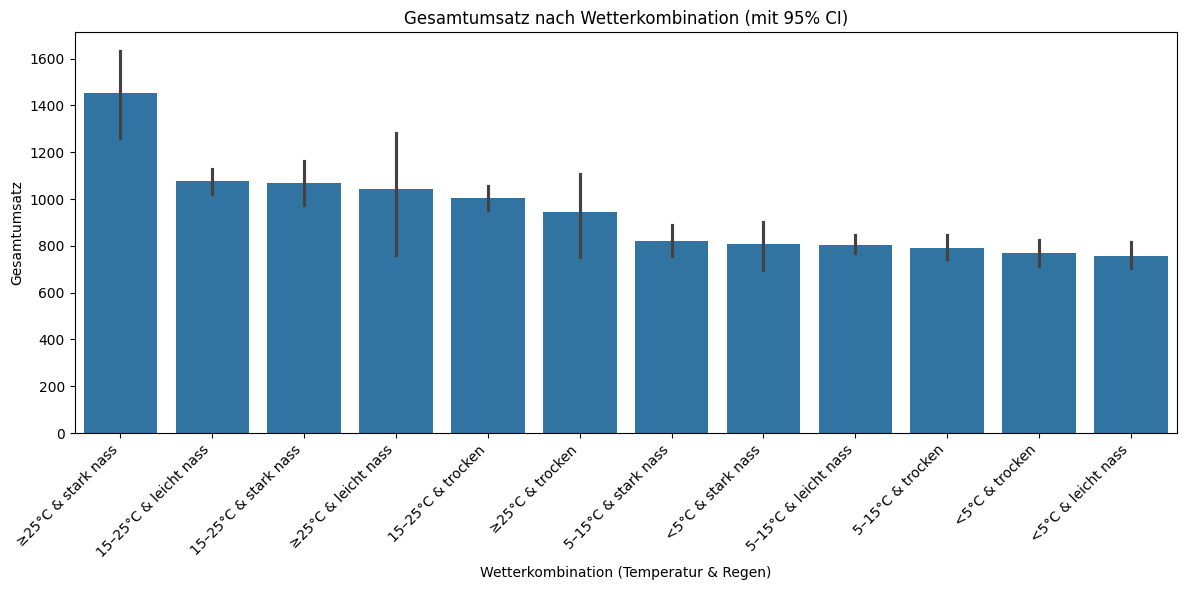

In [101]:
# Barplot mit Konfidenzintervall für Weather_combo
import seaborn as sns
import matplotlib.pyplot as plt

# Reihenfolge nach Mittelwert sortieren
combo_order = df_combo.groupby('Weather_combo')['Umsatz_total'].mean().sort_values(ascending=False).index.tolist()

plt.figure(figsize=(12, 6))
sns.barplot(data=df_combo, x='Weather_combo', y='Umsatz_total', ci=95, order=combo_order)
plt.title("Gesamtumsatz nach Wetterkombination (mit 95% CI)")
plt.xlabel("Wetterkombination (Temperatur & Regen)")
plt.ylabel("Gesamtumsatz")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipykernel_19042/3661440200.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=df_combo, x=combo_column, y='Umsatz_total', ci=95, order=combo_order)


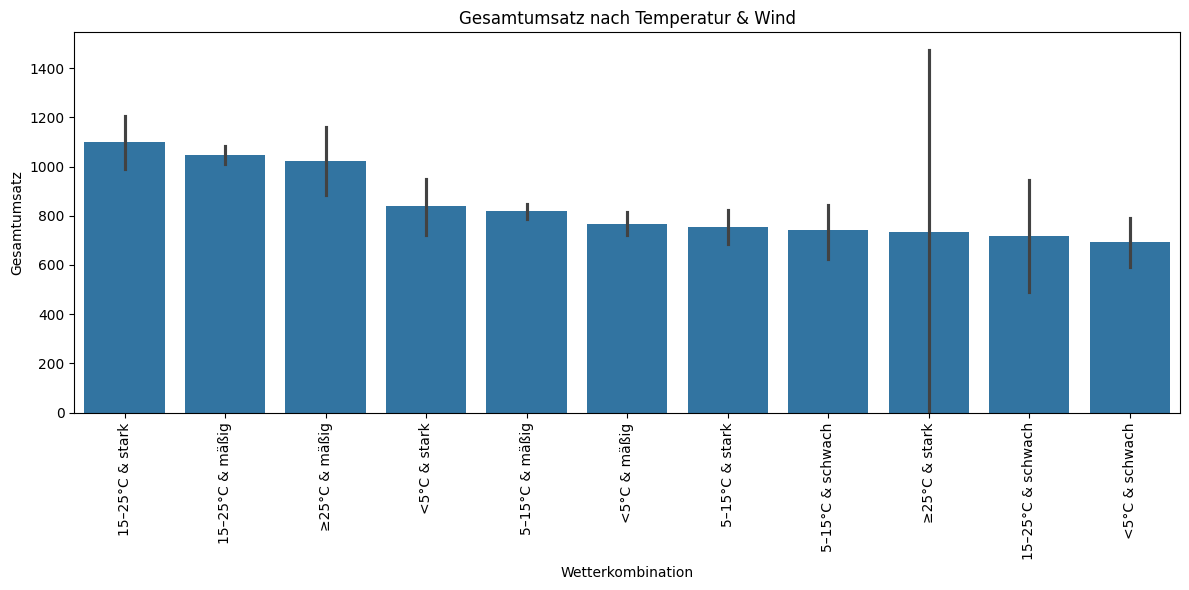

/tmp/ipykernel_19042/3661440200.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=df_combo, x=combo_column, y='Umsatz_total', ci=95, order=combo_order)


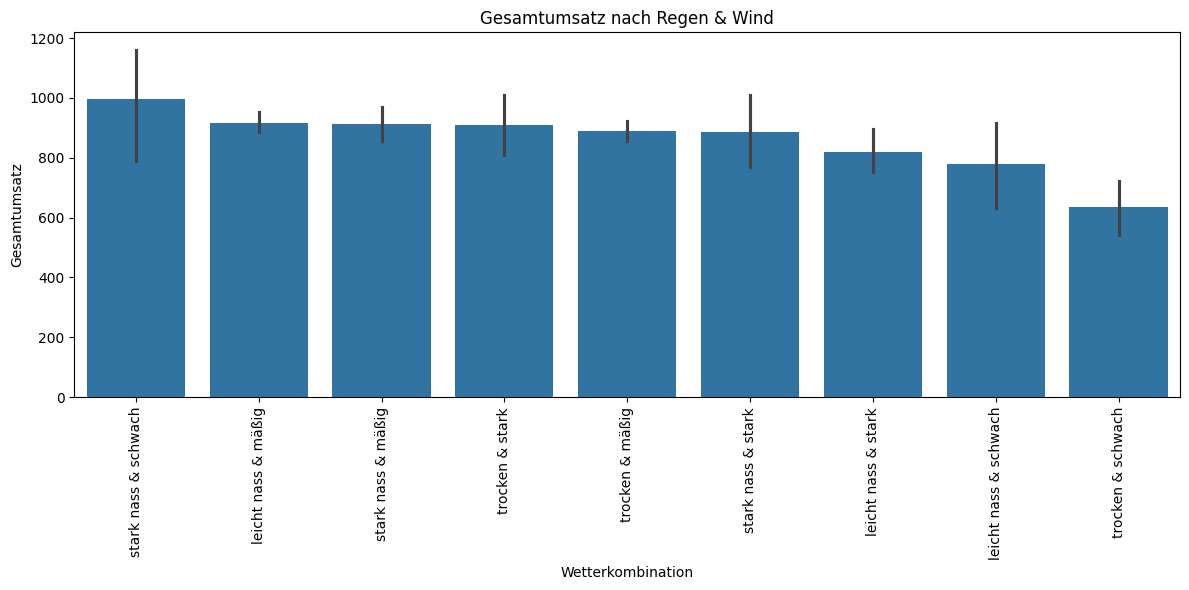

In [102]:
# Windklasse definieren
wind_bins = [-float('inf'), 5, 15, float('inf')]
wind_labels = ['schwach', 'mäßig', 'stark']
df['Wind_class'] = pd.cut(df['Windgeschwindigkeit'], bins=wind_bins, labels=wind_labels)

# Neue Kombinationen erzeugen
df['Temp_Wind_combo'] = df['Temp_class'].astype(str) + ' & ' + df['Wind_class'].astype(str)
df['Rain_Wind_combo'] = df['Rain_bin'].astype(str) + ' & ' + df['Wind_class'].astype(str)
df['Full_combo'] = df['Temp_class'].astype(str) + ' & ' + df['Rain_bin'].astype(str) + ' & ' + df['Wind_class'].astype(str)

# Umsatzdaten
umsatz_total = df.groupby('Datum')['Umsatz'].sum().reset_index(name='Umsatz_total')

# Plotfunktion
def plot_combo(df, combo_column, title):
    weather_info = df[['Datum', combo_column]].drop_duplicates()
    df_combo = pd.merge(umsatz_total, weather_info, on='Datum', how='left')
    combo_order = df_combo.groupby(combo_column)['Umsatz_total'].mean().sort_values(ascending=False).index.tolist()
    
    plt.figure(figsize=(12, 6))
    sns.barplot(data=df_combo, x=combo_column, y='Umsatz_total', ci=95, order=combo_order)
    plt.title(title)
    plt.xlabel("Wetterkombination")
    plt.ylabel("Gesamtumsatz")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# 1. Temperatur & Wind
plot_combo(df, 'Temp_Wind_combo', "Gesamtumsatz nach Temperatur & Wind")

# 2. Regen & Wind
plot_combo(df, 'Rain_Wind_combo', "Gesamtumsatz nach Regen & Wind")

/tmp/ipykernel_19042/2454359149.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=df_hot_rain, x='Hot_HeavyRain', y='Umsatz_total', ci=95)


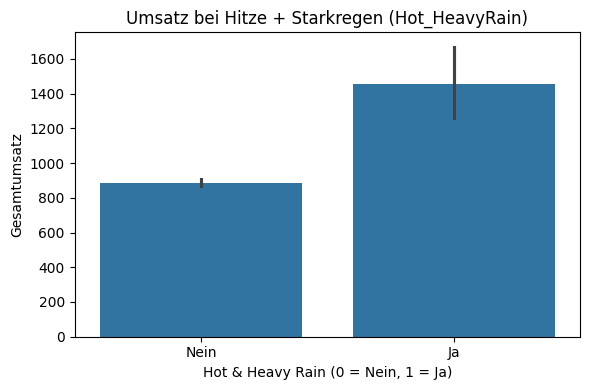

In [103]:
# Umsatzdaten nach Hot_HeavyRain gruppieren
umsatz_total = df.groupby('Datum')['Umsatz'].sum().reset_index(name='Umsatz_total')
hot_rain_info = df[['Datum', 'Temperatur', 'Rain']].drop_duplicates()
hot_rain_info['Hot_HeavyRain'] = ((hot_rain_info['Temperatur'] >= 25) & (hot_rain_info['Rain'] > 5)).astype(int)

# Merge
df_hot_rain = pd.merge(umsatz_total, hot_rain_info[['Datum', 'Hot_HeavyRain']], on='Datum', how='left')

# Plot mit Konfidenzintervall
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.barplot(data=df_hot_rain, x='Hot_HeavyRain', y='Umsatz_total', ci=95)
plt.title("Umsatz bei Hitze + Starkregen (Hot_HeavyRain)")
plt.xlabel("Hot & Heavy Rain (0 = Nein, 1 = Ja)")
plt.ylabel("Gesamtumsatz")
plt.xticks([0, 1], ["Nein", "Ja"])
plt.tight_layout()
plt.show()


In [104]:
# Stündlich aufgelöste Wetterdaten laden
hourly_df = era5

# Spalten anzeigen
hourly_df

,time,total_wind,t2m,d2m,msl,tp,Datum
0,2012-01-01 00:00:00,3.936497,276.801837,276.332809,100748.150577,2.552537e-05,2012-01-01 00:00:00
1,2012-01-01 01:00:00,4.013138,277.130608,276.854801,100685.369407,1.660945e-05,2012-01-01 01:00:00
2,2012-01-01 02:00:00,4.357528,277.609550,277.483587,100630.946501,1.124947e-05,2012-01-01 02:00:00
3,2012-01-01 03:00:00,4.821397,278.172180,278.022043,100565.290846,2.018266e-05,2012-01-01 03:00:00
4,2012-01-01 04:00:00,5.301242,278.963517,278.712272,100522.306329,2.757880e-05,2012-01-01 04:00:00
...,...,...,...,...,...,...,...
66475,2019-08-01 19:00:00,2.355243,292.017665,288.535568,101585.707099,1.314913e-05,2019-08-01 19:00:00
66476,2019-08-01 20:00:00,2.186569,291.033654,288.471807,101588.370738,5.027411e-06,2019-08-01 20:00:00
66477,2019-08-01 21:00:00,1.935205,290.586746,288.627578,101591.606264,5.809960e-06,2019-08-01 21:00:00
66478,2019-08-01 22:00:00,1.968102,289.776808,288.720618,101565.553352,4.972138e-07,2019-08-01 22:00:00


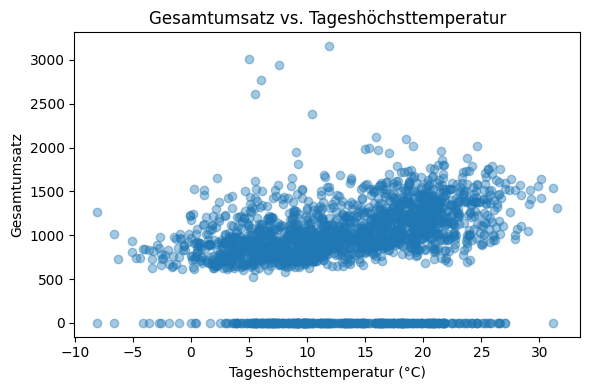

np.float64(0.2388903498547257)

In [117]:
hourly_df['t2m_celsius'] = hourly_df['t2m'] - 273.15
hourly_df['Datum'] = hourly_df['time']

daily_peak_temp = df['Tmax']
# Umsatzdaten aus täglichem DataFrame holen
umsatz_total = df.groupby('Datum')['Umsatz'].sum().reset_index(name='Umsatz_total')
umsatz_total['Datum'] = pd.to_datetime(umsatz_total['Datum'])
umsatz_total['temp_peak']=daily_peak_temp


# Mergen
df_peak = umsatz_total

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.scatter(df_peak['temp_peak'], df_peak['Umsatz_total'], alpha=0.4)
plt.xlabel("Tageshöchsttemperatur (°C)")
plt.ylabel("Gesamtumsatz")
plt.title("Gesamtumsatz vs. Tageshöchsttemperatur")
plt.tight_layout()
plt.show()

# Korrelation berechnen
df_peak['temp_peak'].corr(df_peak['Umsatz_total'])

/tmp/ipykernel_19042/3735477535.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  umsatz_by_class = df_peak.groupby('temp_peak_class')['Umsatz_total'].mean().reindex(labels)


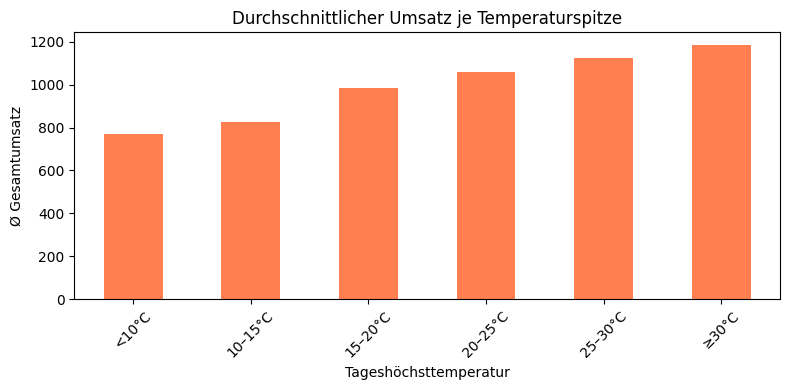

In [118]:
# Temperaturbereiche definieren für Balkenplot
bins = [-float('inf'), 10, 15, 20, 25, 30, float('inf')]
labels = ['<10°C', '10–15°C', '15–20°C', '20–25°C', '25–30°C', '≥30°C']
df_peak['temp_peak_class'] = pd.cut(df_peak['temp_peak'], bins=bins, labels=labels)

# Durchschnittlicher Umsatz je Temperaturklasse
umsatz_by_class = df_peak.groupby('temp_peak_class')['Umsatz_total'].mean().reindex(labels)

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
umsatz_by_class.plot(kind='bar', color='coral')
plt.ylabel("Ø Gesamtumsatz")
plt.xlabel("Tageshöchsttemperatur")
plt.title("Durchschnittlicher Umsatz je Temperaturspitze")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

NameError: name 'feature_collection' is not defined

<Figure size 800x400 with 0 Axes>